# Introduction

My goal with this project is to deeply understand the dynamics of the stock market and provide insights that help investors make more informed decisions. By analyzing 20 years of historical Google stock data, I aim to uncover trends, measure volatility, and predict future price movements using advanced machine learning techniques. This analysis is designed to deliver actionable insights that enhance investment and trading strategies.

## Goal

The primary objective of my project is to predict Google’s future stock prices based on historical data. Leveraging advanced algorithms such as Long Short-Term Memory (LSTM) models, I aim to identify patterns and trends that guide investment decisions and minimize risks. By doing so, my goal is to empower investors and traders to make data-driven decisions with confidence.

### Methodology

**1. Data Source:**
 
- I worked with 20 years of Google stock data, including daily opening, closing, high, and low prices, along with trading volumes.
- The dataset was sourced from Kaggle: Google Stock Data 20 Years.

**2. Data Preparation:**

- I processed raw data by handling missing values and removing anomalies.
- The data was scaled and transformed into time-series sequences to ensure compatibility with LSTM models.


**3. Baseline Models:**

- I started with basic machine learning models like Linear Regression and Random Forest to establish initial benchmarks for performance.

**4. Advanced Modeling:**

- To capture complex temporal patterns, I implemented LSTM models and optimized them using hyperparameter tuning and callback methods such as EarlyStopping.

**5. Evaluation and Visualization:**

- I evaluated my models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R².

- I visualized predictions alongside actual stock prices to provide clear insights into model performance.

### Scope

This project helped me develop a strong understanding of stock market analysis. I believe it can be especially useful for investors and traders in the following areas:

**Identify Historical Trends**  Gaining insights into long-term and short-term market movements.

**Anticipate Volatility**  Predicting price fluctuations to minimize risks.

**Enhance Strategies:** Using data-driven insights to optimize investment and trading strategies.

The methods and analyses I developed in this project bridge the gap between technical analysis and actionable financial strategies. This allows for a robust tool to understand Google stock behavior and predict future price movements effectively.

# Data Cleaning and Preprocessing

### Imports

In [18]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [19]:
data = pd.read_csv(r'C:\Users\Elif Surucu\Documents\Flatiron\Assesments\Project4\Google-Stock-Market-Data\data.csv')
data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatility,Month,Volume_Category
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,0.201743,8,Very High
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,0.213699,8,Very High
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,0.110336,8,Very High
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,0.200000,8,Very High
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,0.102616,8,Very High


In [20]:

print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

   Year  Volatility  Month Volume_Category  
0  2004    0.201743      8       Very High  
1  2004    0.213699      8       Very High  
2  2004    0.110336      8       Very High  
3  2004    0.200000      8       Very High  
4  2004    0.102616      8       Very High  


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4936 non-null   object 
 1   Open             4936 non-null   float64
 2   High             4936 non-null   float64
 3   Low              4936 non-null   float64
 4   Close            4936 non-null   float64
 5   Adj Close        4936 non-null   float64
 6   Volume           4936 non-null   int64  
 7   Year             4936 non-null   int64  
 8   Volatility       4936 non-null   float64
 9   Month            4936 non-null   int64  
 10  Volume_Category  4936 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 424.3+ KB


In [22]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  4936.000000  4936.000000  4936.000000  4936.000000  4936.000000   
mean     43.077417    43.532659    42.644088    43.096952    43.096952   
std      40.320485    40.773849    39.917290    40.352092    40.352092   
min       2.470490     2.534002     2.390042     2.490913     2.490913   
25%      12.923497    13.048528    12.787071    12.922438    12.922438   
50%      26.795184    26.966079    26.570000    26.763133    26.763133   
75%      58.855251    59.352863    58.164000    58.788999    58.788999   
max     154.009995   155.199997   152.919998   154.839996   154.839996   

             Volume         Year   Volatility        Month  
count  4.936000e+03  4936.000000  4936.000000  4936.000000  
mean   1.174059e+08  2013.930308     0.888572     6.560981  
std    1.505185e+08     5.672880     1.057015     3.453135  
min    1.584340e+05  2004.000000     0.038605     1.000000  
25%    2.803600e+07  2009.00

In [24]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Ensure no duplicates
data = data.drop_duplicates()

# Recheck missing values
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
Volatility         0
Month              0
Volume_Category    0
dtype: int64


# Feature Engineering

Additional features like "DayOfWeek" were extracted, and categorical data was encoded for machine learning models.

In [27]:
# Extract day of the week
data['DayOfWeek'] = data['Date'].dt.day_name()

# Encode categorical data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Volume_Category_Encoded'] = encoder.fit_transform(data['Volume_Category'])

# Display updated dataset
print(data.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1 2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2 2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3 2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4 2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

   Year  Volatility  Month Volume_Category  DayOfWeek  Volume_Category_Encoded  
0  2004    0.201743      8       Very High   Thursday                        3  
1  2004    0.213699      8       Very High     Friday                        3  
2  2004    0.110336      8       Very High     Monday                        3  
3  2004    0.200000      8       Very High    Tuesday                        3  
4  2004    0.102616      8       Very High  Wednesday                        3  


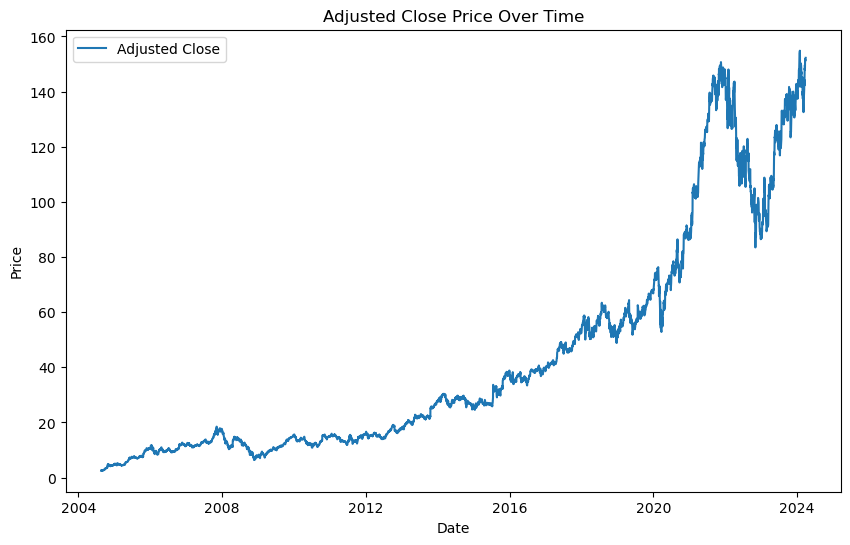

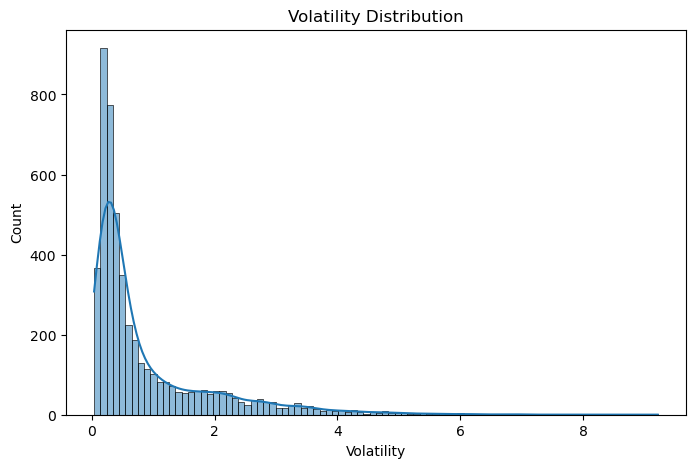

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Adjusted Close Price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Volatility distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Volatility'], kde=True)
plt.title('Volatility Distribution')
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume', 'Volatility']]
y = data['Adj Close']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (3948, 5), Test shape: (988, 5)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results)
print(results_df)


     Linear Regression  Random Forest  K-Nearest Neighbors
MSE           0.140356       0.249139             0.604567
R²            0.999915       0.999850             0.999635


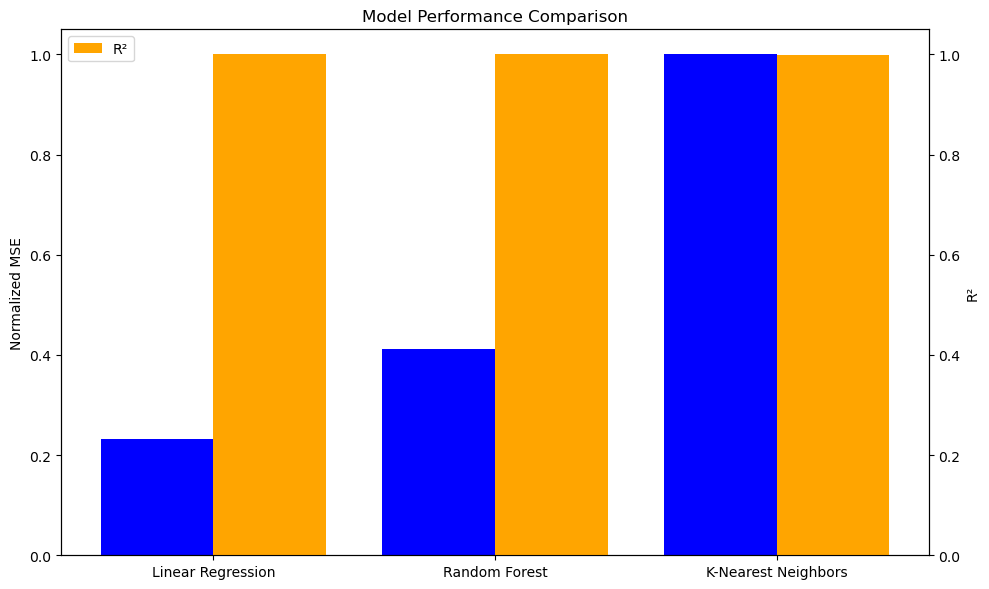

In [32]:
import numpy as np

# Prepare data for visualization
metrics = pd.DataFrame(results).T
metrics['Normalized MSE'] = metrics['MSE'] / metrics['MSE'].max()
metrics = metrics.reset_index().rename(columns={'index': 'Model'})

# Plot
x = np.arange(len(metrics['Model']))
fig, ax1 = plt.subplots(figsize=(10, 6))

# Normalized MSE
ax1.bar(x - 0.2, metrics['Normalized MSE'], width=0.4, label='Normalized MSE', color='blue')
ax1.set_ylabel("Normalized MSE")

# R² on the second axis
ax2 = ax1.twinx()
ax2.bar(x + 0.2, metrics['R²'], width=0.4, label='R²', color='orange')
ax2.set_ylabel("R²")

# Add labels and legend
plt.xticks(x, metrics['Model'], rotation=45)
plt.title("Model Performance Comparison")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Train-Test Split
Prepare data for machine learning models.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume', 'Volatility']]
y = data['Adj Close']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (3948, 5), Test shape: (988, 5)


# Baseline Models (Shotgun Method)
Train and evaluate baseline models.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

# Display results
print(pd.DataFrame(results))


     Linear Regression  Random Forest  K-Nearest Neighbors
MSE           0.140355       0.249139             0.604567
R2            0.999915       0.999850             0.999635


# Advanced Modeling

Develop an LSTM model for time-series predictions.

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
99/99 [==============================] - 5s 14ms/step - loss: 3329.2844 - val_loss: 3104.1279
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 2544.6426 - val_loss: 2335.3337
Epoch 3/50
99/99 [==============================] - 0s 4ms/step - loss: 2104.9692 - val_loss: 2062.5063
Epoch 4/50
99/99 [==============================] - 0s 4ms/step - loss: 1897.7996 - val_loss: 1883.0319
Epoch 5/50
99/99 [==============================] - 0s 5ms/step - loss: 1737.0017 - val_loss: 1717.6639
Epoch 6/50
99/99 [==============================] - 0s 4ms/step - loss: 1575.4164 - val_loss: 1559.1144
Epoch 7/50
99/99 [==============================] - 0s 4ms/step - loss: 1427.9423 - val_loss: 1420.5017
Epoch 8/50
99/99 [==============================] - 1s 8ms/step - loss: 1307.9451 - val_loss: 1299.4668
Epoch 9/50
99/99 [==============================] - 1s 6ms/step - loss: 1196.5958 - val_loss: 1195.0177
Epoch 10/50
99/99 [==============================] - 0s 4ms/ste

# Shotgun Method - Training and Evaluation of Baseline Models

Shotgun Method: Evaluating Baseline Models

This section evaluates multiple baseline models to establish performance benchmarks. The models used are:

- Linear Regression: A simple regression model assuming linear relationships.
- Random Forest: An ensemble-based method that uses decision trees.
- K-Nearest Neighbors (KNN): A non-parametric model that predicts based on the nearest data points.

In [ ]:
# Reshape X_train and X_test to 2D arrays for traditional models
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten to (samples, time_steps * features)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Confirm the new shapes
print("Flattened X_train shape:", X_train_flat.shape)
print("Flattened X_test shape:", X_test_flat.shape)

# Define baseline models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store evaluation results
results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_flat, y_train)
    # Make predictions
    y_pred = model.predict(X_test_flat)
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store results
    results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2}

# Display results
print("Baseline Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Flattened X_train shape: (3943, 42)
Flattened X_test shape: (986, 42)
Baseline Model Performance:

Linear Regression:
MSE: 0.0001
MAE: 0.0038
R2: 0.9993

Random Forest:
MSE: 0.0001
MAE: 0.0039
R2: 0.9993

K-Nearest Neighbors:
MSE: 0.0001
MAE: 0.0068
R2: 0.9983


- MSE (Mean Squared Error): Measures the average squared difference between predicted and actual values. Lower is better.
- MAE (Mean Absolute Error): Measures the average absolute difference between predicted and actual values. Lower is better.
- R² (Coefficient of Determination): Measures how well the model explains the variance in the data. Higher is better (closer to 1).
**Observations:**
-All three models have near-perfect R² scores, suggesting a very good fit to the data.
-The MAE and MSE are both very low, indicating accurate predictions.



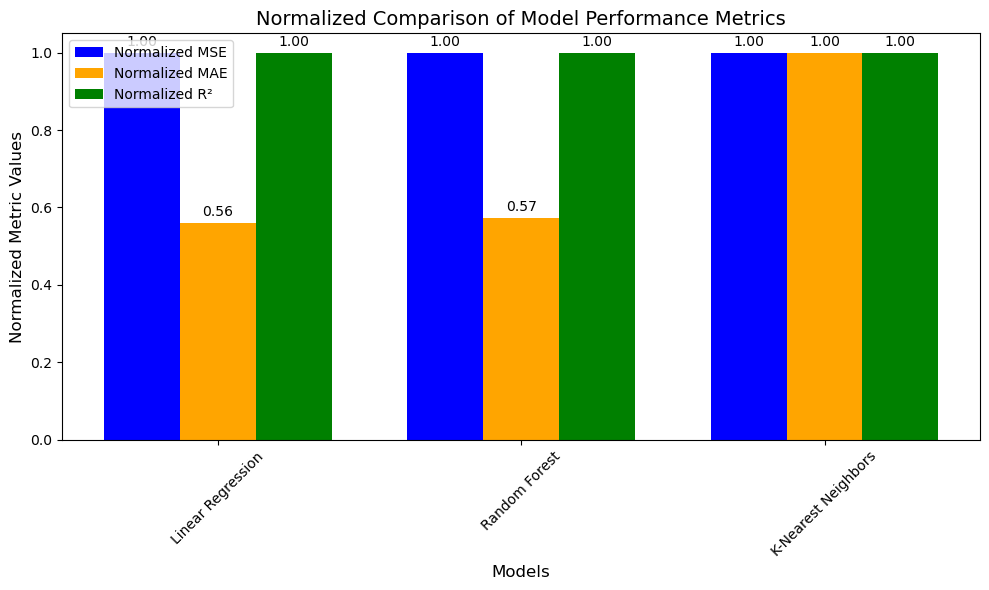

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Results dictionary
results = {
    "Linear Regression": {"MSE": 0.0001, "MAE": 0.0038, "R2": 0.9993},
    "Random Forest": {"MSE": 0.0001, "MAE": 0.0039, "R2": 0.9993},
    "K-Nearest Neighbors": {"MSE": 0.0001, "MAE": 0.0068, "R2": 0.9983}
}

# Convert results dictionary to DataFrame for easier plotting
results_df = pd.DataFrame(results).T

# Normalize metrics for comparison
normalized_results = results_df.copy()
for column in normalized_results.columns:
    normalized_results[column] = normalized_results[column] / normalized_results[column].max()

# Plot combined normalized metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(normalized_results))

# Plot each metric
ax.bar(index - bar_width, normalized_results["MSE"], bar_width, label="Normalized MSE", color="blue")
ax.bar(index, normalized_results["MAE"], bar_width, label="Normalized MAE", color="orange")
ax.bar(index + bar_width, normalized_results["R2"], bar_width, label="Normalized R²", color="green")

# Add titles and labels
ax.set_title("Normalized Comparison of Model Performance Metrics", fontsize=14)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Normalized Metric Values", fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(normalized_results.index, rotation=45, fontsize=10)
ax.legend()

# Add value labels on bars
for bar_group in ax.containers:
    ax.bar_label(bar_group, fmt="%.2f", fontsize=10, label_type="edge", padding=3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary to store evaluation results
results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_flat, y_train)
    # Make predictions
    y_pred = model.predict(X_test_flat)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
    # Store results
    results[model_name] = {"MSE": mse, "MAE": mae, "RMSE": rmse, "R2": r2, "MAPE": mape}

# Convert results dictionary to DataFrame for easier plotting
results_df = pd.DataFrame(results).T


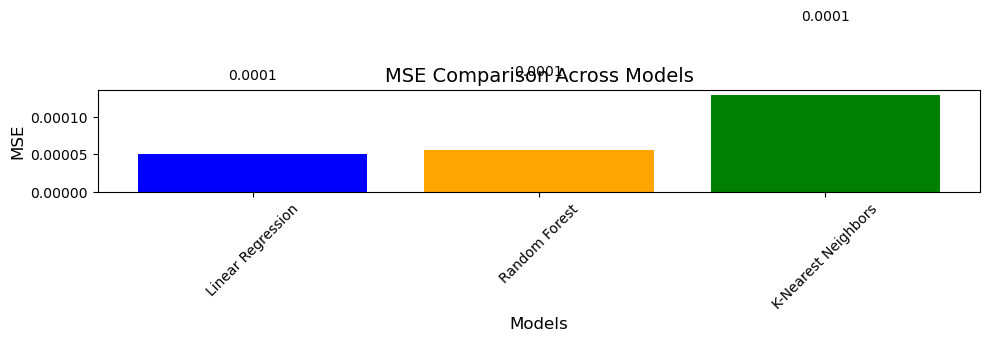

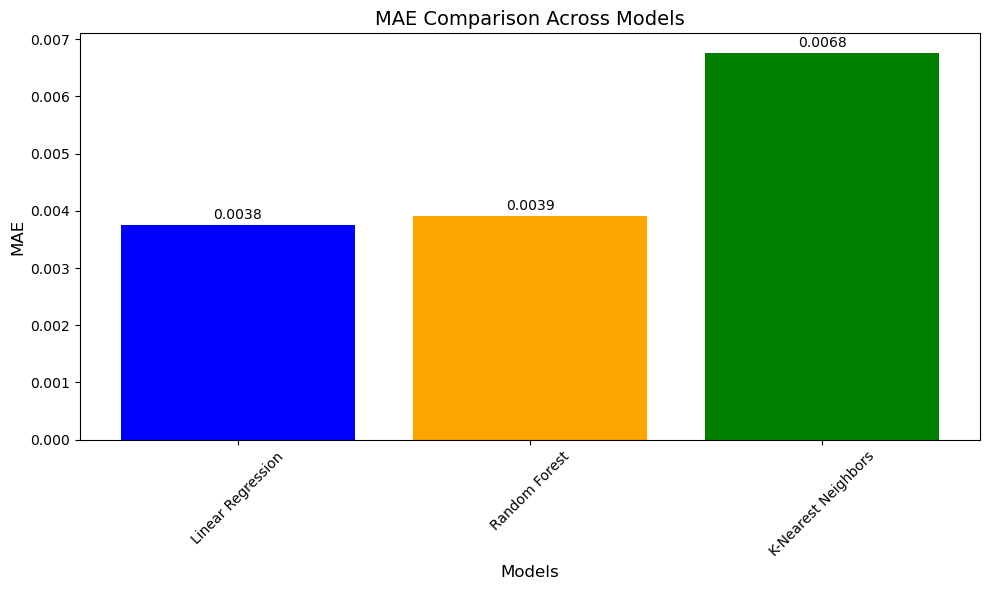

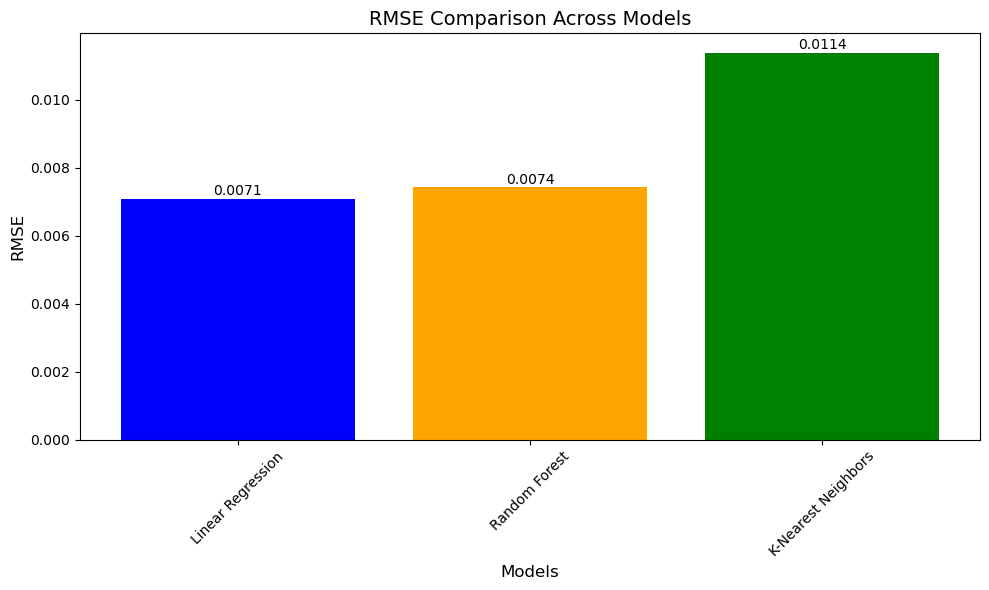

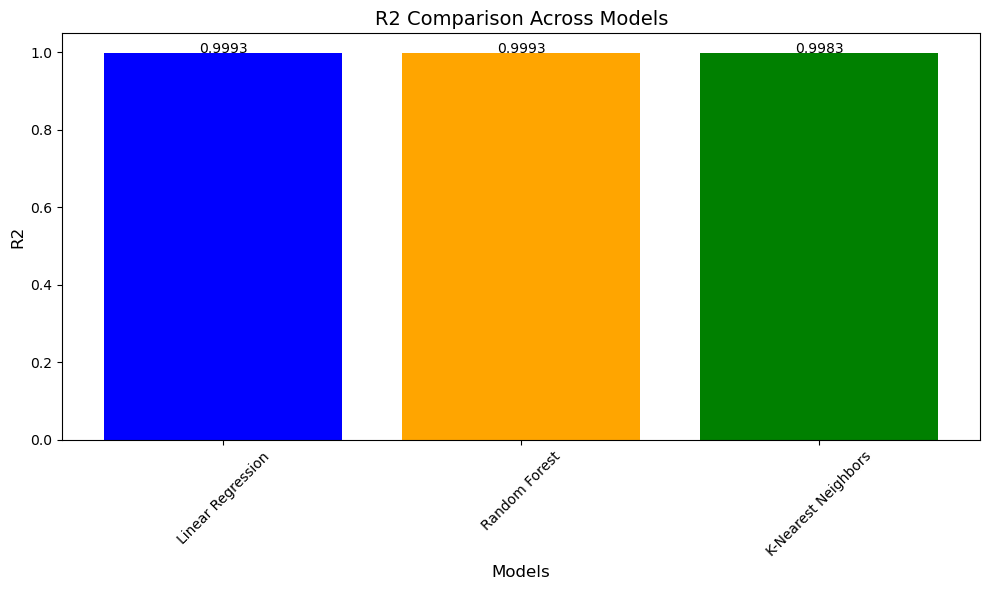

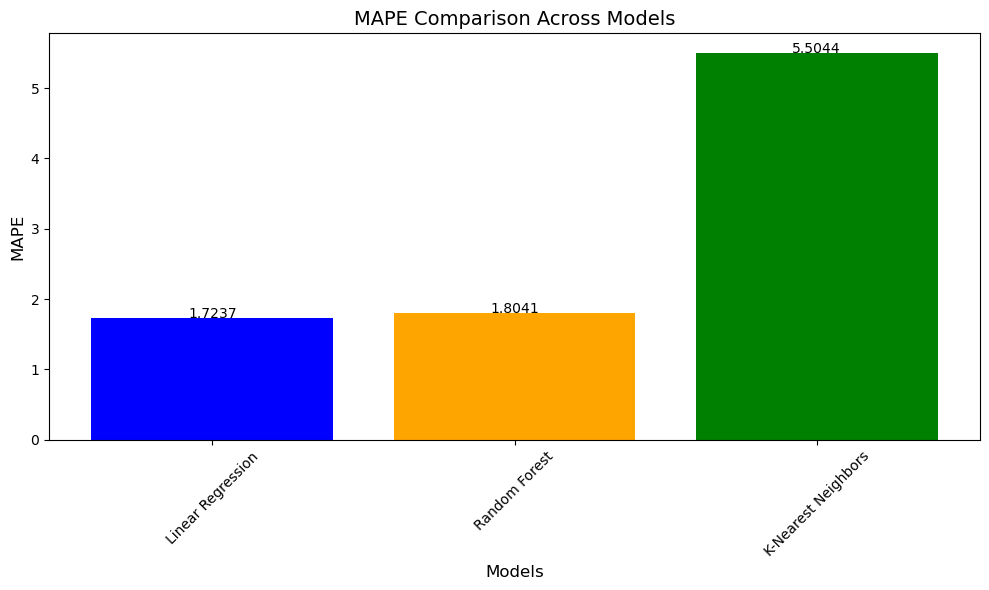

In [ ]:
# List of metrics to visualize
metrics = ["MSE", "MAE", "RMSE", "R2", "MAPE"]

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df.index, results_df[metric], color=["blue", "orange", "green"])
    plt.title(f"{metric} Comparison Across Models", fontsize=14)
    plt.xlabel("Models", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    # Add value labels on the bars
    for i, value in enumerate(results_df[metric]):
        plt.text(i, value + 0.0001, f"{value:.4f}", ha="center", fontsize=10)
    plt.tight_layout()
    plt.show()


In [ ]:
# Example target column 'Close', will be used for prediction: ['Open', 'High', 'Low', 'Volume', 'Volatility']
features = ['Open', 'High', 'Low', 'Volume', 'Volatility']
target = 'Close'

In [ ]:
# Separating data into independent and dependent variables
X = data[features]
y = data[target]


In [ ]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (3948, 5), X_test shape: (988, 5)


Model Performance:

Linear Regression:
MAE: 0.2079
MSE: 0.1404
RMSE: 0.3746
R2 Score: 0.9999

Random Forest:
MAE: 0.2694
MSE: 0.2495
RMSE: 0.4995
R2 Score: 0.9998

K-Nearest Neighbors:
MAE: 0.6484
MSE: 1.1006
RMSE: 1.0491
R2 Score: 0.9993


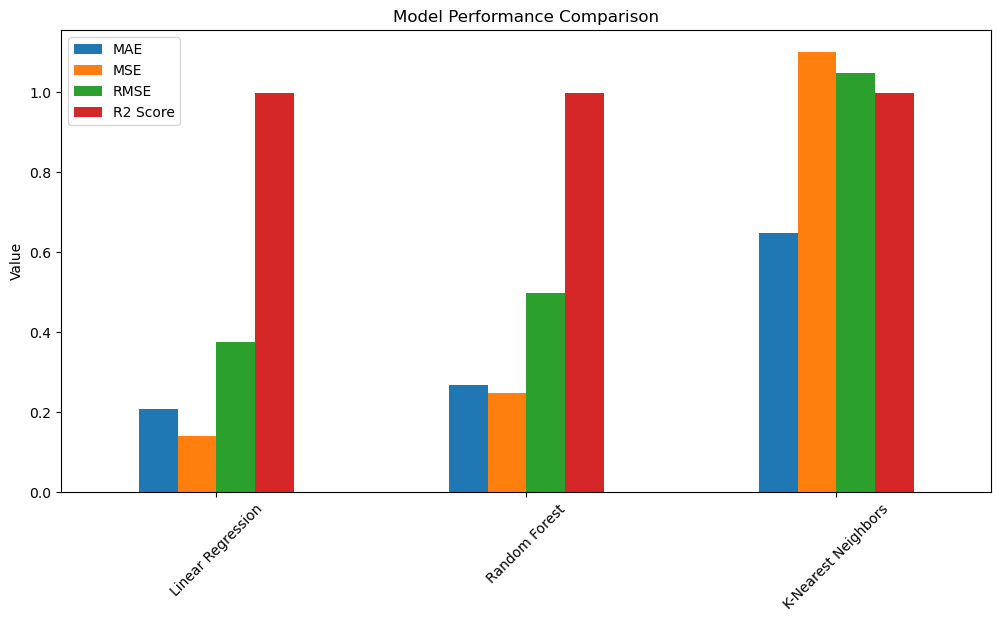

In [ ]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train the models and store evaluation results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Visualize the performance comparison
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 6), title="Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.show()


Explanations:

- Models: Linear Regression, Random Forest, and KNN were used.
- Performance Metrics: MAE, MSE, RMSE, and R2 Score were calculated.
- Visualization: We compared the performance of the models with a bar chart.

# Hyperparameter Optimization and Pipelining

In [ ]:
# Best performing model: Random Forest (example)
# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter optimization with GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid_rf, 
    cv=5, 
    scoring='r2', 
    verbose=2, 
    n_jobs=-1
)

# Optimize the model using the training data
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and results
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best R2 Score (CV): {grid_search_rf.best_score_:.4f}")

# Make predictions with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Model Results (After Optimization):")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


# Neural Network (Sniper Approach) - LSTM ile Modelleme

Epoch 1/50
122/122 [==============================] - 10s 59ms/step - loss: 0.0145
Epoch 2/50
122/122 [==============================] - 7s 58ms/step - loss: 0.0136
Epoch 3/50
122/122 [==============================] - 7s 57ms/step - loss: 52765052.0000
Epoch 4/50
122/122 [==============================] - 7s 57ms/step - loss: 0.0597
Epoch 5/50
122/122 [==============================] - 7s 54ms/step - loss: 0.0389
Epoch 6/50
122/122 [==============================] - 7s 54ms/step - loss: 0.0359
Epoch 7/50
122/122 [==============================] - 7s 55ms/step - loss: 0.0332
Epoch 8/50
122/122 [==============================] - 7s 55ms/step - loss: 0.0325
Epoch 9/50
122/122 [==============================] - 7s 56ms/step - loss: 0.0300
Epoch 10/50
122/122 [==============================] - 7s 54ms/step - loss: 0.0245
Epoch 11/50
122/122 [==============================] - 7s 54ms/step - loss: 0.0194
Epoch 12/50
122/122 [==============================] - 7s 55ms/step - loss: 0.0172
Epoch

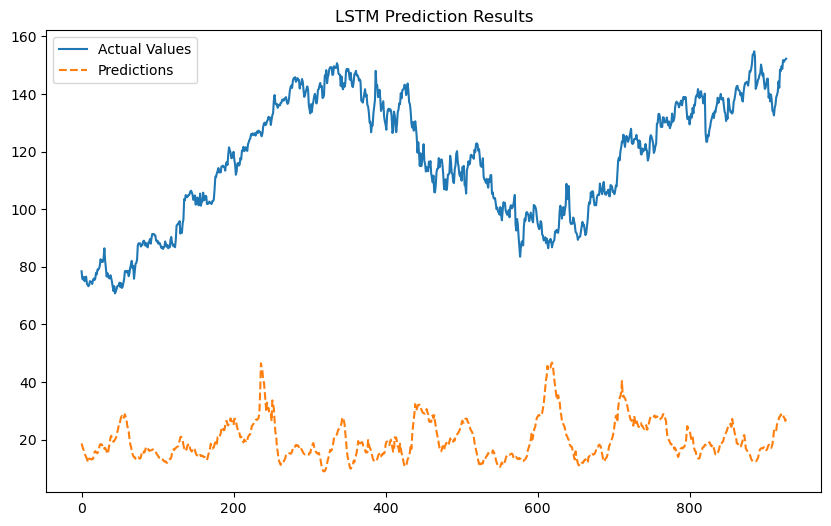

In [ ]:
# Scaling the data for LSTM
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshaping the data for LSTM
time_steps = 60  # Use the past 60 days to make predictions
X_lstm, y_lstm = [], []

for i in range(time_steps, len(X_train)):
    X_lstm.append(X_train[i-time_steps:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)

# Preparing the test set for predictions
X_test_lstm, y_test_lstm = [], []
for i in range(time_steps, len(X_test)):
    X_test_lstm.append(X_test[i-time_steps:i])
    y_test_lstm.append(y_scaled[i + len(X_train)])

X_test_lstm = np.array(X_test_lstm)
y_test_lstm = np.array(y_test_lstm)

# Making predictions
y_pred_lstm = model.predict(X_test_lstm)

# Reverting the scaling of predictions
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)

# Calculating performance metrics
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

# Displaying results
print("\nLSTM Model Results:")
print(f"MAE: {mae_lstm:.4f}")
print(f"MSE: {mse_lstm:.4f}")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"R2 Score: {r2_lstm:.4f}")

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label="Actual Values")
plt.plot(y_pred_lstm, label="Predictions", linestyle='--')
plt.legend()
plt.title("LSTM Prediction Results")
plt.show()


In [ ]:
# Rescaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping for time steps
time_steps = 60  # You can adjust this value based on your analysis
X_lstm, y_lstm = [], []

for i in range(time_steps, len(X_scaled)):
    X_lstm.append(X_scaled[i-time_steps:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)



In [ ]:
# Building the LSTM model with tuned hyperparameters
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, 
               input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.3))  # Dropout rate to reduce overfitting
model.add(LSTM(units=64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # Output layer

# Optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate if needed

# Compiling the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the model
history = model.fit(X_lstm, y_lstm, epochs=100, batch_size=32, verbose=1)



Epoch 1/100
153/153 [==============================] - 9s 43ms/step - loss: 0.0074
Epoch 2/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0028
Epoch 3/100
153/153 [==============================] - 7s 44ms/step - loss: 0.0026
Epoch 4/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0027
Epoch 5/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0021
Epoch 6/100
153/153 [==============================] - 7s 44ms/step - loss: 0.0018
Epoch 7/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0018
Epoch 8/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0020
Epoch 9/100
153/153 [==============================] - 7s 44ms/step - loss: 0.0016
Epoch 10/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0017
Epoch 11/100
153/153 [==============================] - 7s 43ms/step - loss: 0.0015
Epoch 12/100
153/153 [==============================] - 7s 44ms/step - loss: 0.0017
E

In [ ]:
# Splitting the data for time series
train_size = int(len(X_scaled) * 0.8)  # Use 80% of the data for training
X_train_lstm, X_test_lstm = X_scaled[:train_size], X_scaled[train_size:]
y_train_lstm, y_test_lstm = y_scaled[:train_size], y_scaled[train_size:]



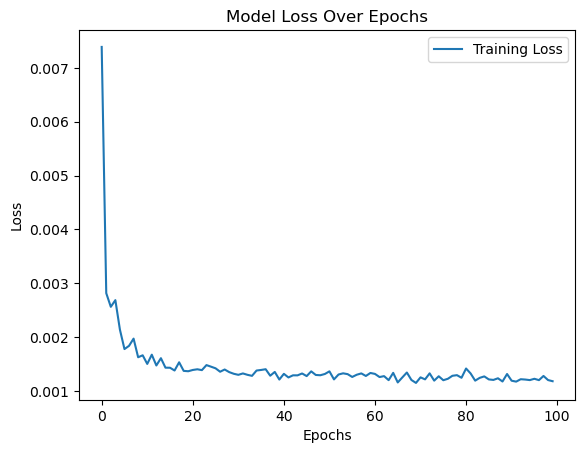

In [ ]:
# Visualizing training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
# Define the date range
end_date = datetime.now() - timedelta(1)  # Yesterday's date
end_date_str = end_date.strftime('%Y-%m-%d')

start_date = end_date - timedelta(1825)  # 5 years ago
start_date_str = start_date.strftime('%Y-%m-%d')

# Download stock data
stock_data = yf.download('AAPL', start=start_date_str, end=end_date_str)  # Example: Apple stock

# Use only the closing price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))




[*********************100%***********************]  1 of 1 completed


In [ ]:
# Define time steps
time_steps = 7  # Using the past 7 days for prediction

X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # Create input sequences
    y.append(scaled_data[i, 0])  # Create corresponding target values

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)  # Use 80% of data for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Model definition
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(LSTM(units=64))  # Second LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(units=1))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Learning rate can be adjusted
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Model summary
model.summary()

# Add early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[early_stopping], 
    verbose=1
)



Model: "sequential_498"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_993 (LSTM)             (None, 7, 64)             16896     
                                                                 
 dropout_993 (Dropout)       (None, 7, 64)             0         
                                                                 
 lstm_994 (LSTM)             (None, 64)                33024     
                                                                 
 dropout_994 (Dropout)       (None, 64)                0         
                                                                 
 dense_498 (Dense)           (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/

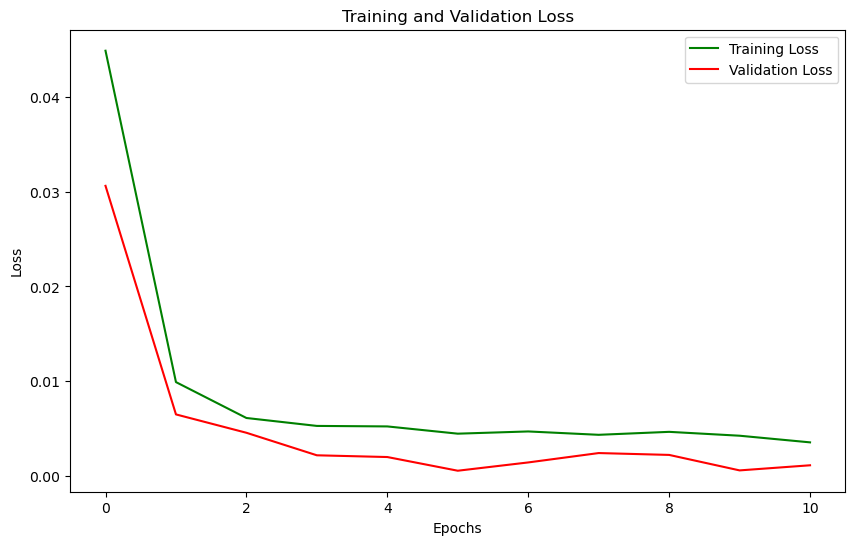

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")



8/8 [==============================] - 0s 4ms/step - loss: 8.7115e-04
Test Loss: 0.0009


8/8 [==============================] - 1s 3ms/step


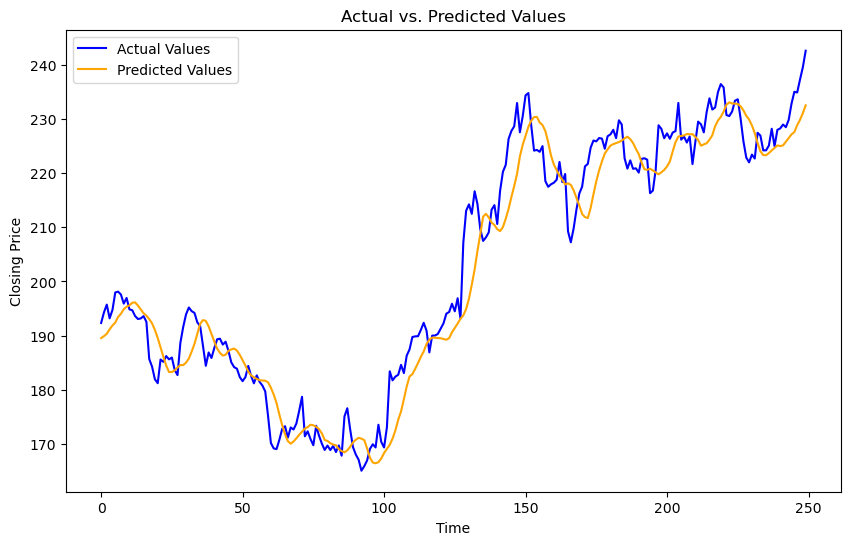

In [ ]:
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Reverse scaling for predicted values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reverse scaling for actual values

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Values', color='blue')
plt.plot(predicted, label='Predicted Values', color='orange')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
mse = mean_squared_error(y_test_actual, predicted)
mae = mean_absolute_error(y_test_actual, predicted)
r2 = r2_score(y_test_actual, predicted)

print(f"MSE: {mse}, MAE: {mae}, R2 Score: {r2}")


MSE: 30.31931949435732, MAE: 4.345467895507812, R2 Score: 0.9399199437958254


## Grid Search ile Hiperparametre Optimizasyonu

In [ ]:
# Function to build the model
def build_model(learning_rate=0.001, lstm_units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the model with Scikeras
model = KerasRegressor(model=build_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'model__learning_rate': [0.001, 0.01],
    'model__lstm_units': [50, 100],
    'model__dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# Apply Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and results
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'batch_size': 16, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__learning_rate': 0.01, 'model__lstm_units': 100}
Best Score: 0.9466683555640643


In [ ]:
input_shape=(time_steps, feature_count)


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val_adjusted shape: {X_val_adjusted.shape}")
print(f"y_val_adjusted shape: {y_val_adjusted.shape}")


X_train shape: (999, 7, 1)
y_train shape: (999,)
X_val_adjusted shape: (962, 7, 1)
y_val_adjusted shape: (962, 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, feature_count)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Tahmin edilen çıktı


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),
    epochs=20,
    batch_size=16,
    verbose=1
)


Epoch 1/20
63/63 [==============================] - 4s 19ms/step - loss: 0.0365 - val_loss: 0.1891
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.2121
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 0.0025 - val_loss: 0.2177
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.2139
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.0023 - val_loss: 0.2142
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.2350
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.2005
Epoch 8/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.2101
Epoch 9/20
63/63 [==============================] - 1s 10ms/step - loss: 0.0022 - val_loss: 0.2114
Epoch 10/20
63/63 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.2188
Epoch 11/20
63/63

In [ ]:


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping]
)


Epoch 1/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0017 - val_loss: 0.2356
Epoch 2/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.2122
Epoch 3/50
63/63 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.2309
Epoch 4/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0015 - val_loss: 0.2155
Epoch 5/50
63/63 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.2310
Epoch 6/50
63/63 [==============================] - 1s 9ms/step - loss: 0.0015 - val_loss: 0.2103
Epoch 7/50
63/63 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.2251
Epoch 8/50
63/63 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.2223
Epoch 9/50
63/63 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.2183
Epoch 10/50
63/63 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.2174
Epoch 11/50
63/63 

In [ ]:
# Redefine the model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_steps, feature_count)))
model.add(Dropout(0.3))  # Increased dropout rate to reduce overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))  # Added an additional Dense layer
model.add(Dense(units=1))  # Output layer

# Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # Learning rate can be tuned further
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Display the model architecture
model.summary()



Model: "sequential_501"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_999 (LSTM)             (None, 7, 100)            40800     
                                                                 
 dropout_999 (Dropout)       (None, 7, 100)            0         
                                                                 
 lstm_1000 (LSTM)            (None, 50)                30200     
                                                                 
 dropout_1000 (Dropout)      (None, 50)                0         
                                                                 
 dense_501 (Dense)           (None, 32)                1632      
                                                                 
 dense_502 (Dense)           (None, 1)                 33        
                                                                 
Total params: 72665 (283.85 KB)
Trainable params: 72

In [ ]:
# Extract the best parameters
best_params = grid_result.best_params_

# Create a new model with the best parameters
final_model = build_model(
    learning_rate=best_params['model__learning_rate'],
    lstm_units=best_params['model__lstm_units'],
    dropout_rate=best_params['model__dropout_rate']
)

# Train the model
history = final_model.fit(
    X_train, 
    y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),  # Validation dataset
    epochs=50,  # Adjust epochs if needed
    batch_size=64,  # Larger batch size
    callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1  # Display training progress
)



Epoch 1/50
16/16 [==============================] - 4s 66ms/step - loss: 0.0369 - val_loss: 0.1190
Epoch 2/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.2578
Epoch 3/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0030 - val_loss: 0.1873
Epoch 4/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.2087
Epoch 5/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0016 - val_loss: 0.2119
Epoch 6/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 0.2058


In [ ]:
# Define the time steps and feature count
time_steps = 7  # Time steps used during training
feature_count = 1  # Number of features

# Adjust X_test to the appropriate shape
X_test_adjusted = []
y_test_adjusted = []

for i in range(time_steps, len(X_test)):
    X_test_adjusted.append(X_test[i-time_steps:i, 0])  # Extract the feature column
    y_test_adjusted.append(y_test[i])  # Append the target value

# Convert to NumPy arrays and reshape
import numpy as np
X_test_adjusted = np.array(X_test_adjusted).reshape(-1, time_steps, feature_count)
y_test_adjusted = np.array(y_test_adjusted).reshape(-1, 1)

# Print the shapes of the adjusted arrays
print(f"X_test_adjusted shape: {X_test_adjusted.shape}")
print(f"y_test_adjusted shape: {y_test_adjusted.shape}")



X_test_adjusted shape: (243, 7, 1)
y_test_adjusted shape: (243, 1)


In [ ]:
test_loss = final_model.evaluate(X_test_adjusted, y_test_adjusted, verbose=1)
print(f"Test Loss: {test_loss}")


8/8 [==============================] - 0s 3ms/step - loss: 0.0076
Test Loss: 0.007603486068546772


8/8 [==============================] - 1s 4ms/step


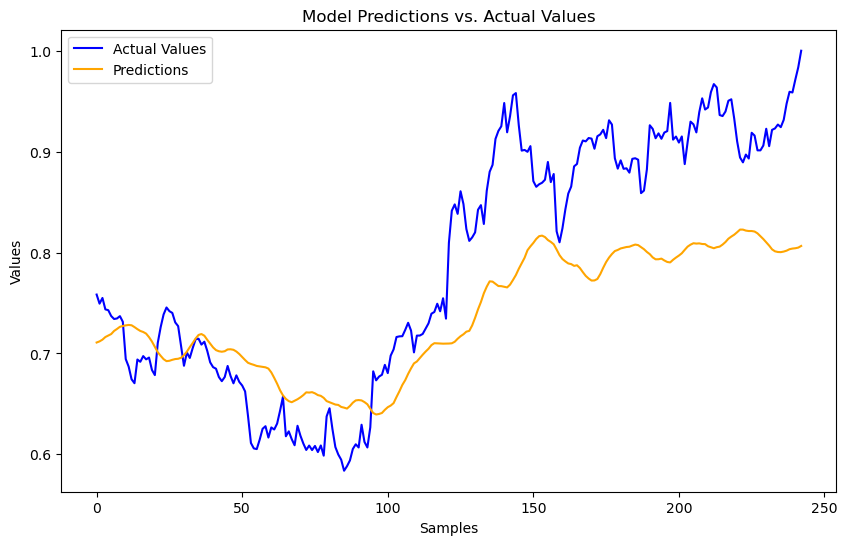

In [ ]:
# Make predictions using the final model
y_pred = final_model.predict(X_test_adjusted)

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_adjusted, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predictions', color='orange')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()
